<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/sprint_deep_learning_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## sprint 深層学習スクラッチ ニューラルネットワーク

In [ ]:
# データセットをダウンロードするコード
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
import numpy as np
np.save("C:/Users/es/Documents/Python Scripts/3.Mar/FrameWork1/X_train", X_train)
np.save("C:/Users/es/Documents/Python Scripts/3.Mar/FrameWork1/y_train", y_train)
np.save("C:/Users/es/Documents/Python Scripts/3.Mar/FrameWork1/X_test", X_test)
np.save("C:/Users/es/Documents/Python Scripts/3.Mar/FrameWork1/y_test", y_test)

In [ ]:
# データセットの確認
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(y_train.shape) # (60000,)
print(y_test.shape) # (10000,)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   

In [ ]:
# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

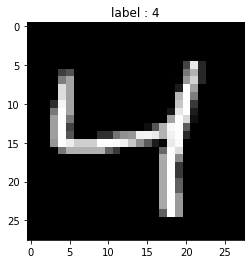

In [ ]:
# 画像データの可視化
import matplotlib.pyplot as plt
%matplotlib inline
index = 2
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

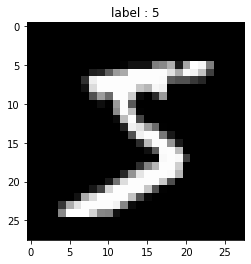

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [ ]:
# 画像データの可視化 float型
import numpy as np
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

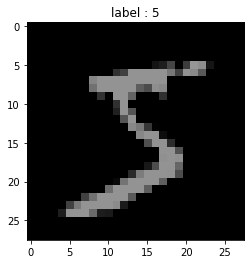

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [ ]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray', vmin = 0, vmax = 255)
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

In [ ]:
# 前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [ ]:
y_train_one_hot = (y_train.reshape(-1,1) == np.arange(10)).astype(np.float64)
y_test_one_hot = (y_test.reshape(-1,1) == np.arange(10)).astype(np.float64)
print(y_train.shape)
print(y_train_one_hot.shape)
print(y_train_one_hot.dtype)

(60000,)
(60000, 10)
float64


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [ ]:
X_train.max(axis=1, keepdims=True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
def split_data(X, permutation, val_size_rate=0.2):
    X = X[permutation]
    val_size = int(len(X) * val_size_rate)
    val = X[:val_size]
    train = X[val_size:]
    return train, val

permutation = np.random.permutation(np.arange(len(X_train)))
X_train, X_val = split_data(X_train, permutation)
y_train, y_val = split_data(y_train, permutation)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
#print(X_train.shape) # (48000, 784)
#print(X_val.shape) # (12000, 784)

In [ ]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [ ]:
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    batch_size = 20 # バッチサイズ
    sigma = 0.01 # ガウス分布の標準偏差
    n_features = 784 # 特徴量の数
    n_nodes1 = 400 # 1層目のノード数
    n_nodes2 = 200 # 2層目のノード数
    n_output = 10 # 出力のクラス数（3層目のノード数）

    """
    batch_size = 20
    sigma = 0.01
    n_features = 784
    n_nodes1 = 400
    n_nodes2 = 200
    n_output = 10
    
    def __init__(self, seed=0, verbose = True, verbose2 = False):
        self.seed = 0
        self.verbose = verbose
        self.verbose2 = verbose2
        pass
    
    def _initalize_weight(self, n_features, n_nodes):
        # 【問題1】重みの初期値を決めるコードの作成

        W = self.sigma * np.random.randn(n_features, n_nodes)
        
        return W
    
    def _initalize_bias(self, n_features):
        # 【問題1】バイアスの初期値を決めるコードの作成

        B = self.sigma * np.random.randn(n_features)
        
        return B
    
    
    def _initalizing(self):

        np.random.seed(self.seed)
        self.W1 = self._initalize_weight(self.n_features, self.n_nodes1) # W1: (784, 400)
        self.W2 = self._initalize_weight(self.n_nodes1, self.n_nodes2) # W2: (400, 200) 
        self.W3 = self._initalize_weight(self.n_nodes2, self.n_output) # W3: (200, 10) 

        self.B1 = self._initalize_bias(self.n_nodes1) # B1: (400)
        self.B2 = self._initalize_bias(self.n_nodes2) # B2: (200) 
        self.B3 = self._initalize_bias(self.n_output) # B3: (10) 
    
    def _softmax(self, A):
        # ソフトマックス関数
        
        if (A.ndim == 1):
            A = Z[None,:]    # ベクトル形状なら行列形状に変換
            
        Z = np.exp(A) / np.sum(np.exp(A), axis=1, keepdims=True)
        # テンソル（Z：行列）、軸（axis=1： 列の横方向に計算）
        
        return Z

    # 以下の活性化関数を参照
    def _logsumexp(self, X):
        """Calculates log(sum(exp(x))).
        """
        xmax = X.max(axis=1, keepdims=True)
        return np.log(np.exp(X - xmax).sum(axis=1, keepdims=True)) + xmax
    
    def _forward_propergation(self, X):
        # 【問題2】フォワードプロパゲーションの実装
        
        # 1層目の計算
        self.A1 = np.dot(X, self.W1) + self.B1
        self.Z1 = np.tanh(self.A1)
    
        # 2層目の計算
        self.A2 = np.dot(self.Z1, self.W2) + self.B2
        self.Z2 = np.tanh(self.A2)
        
        # 3層目の計算
        self.A3 = np.dot(self.Z2, self.W3) + self.B3
        log_z3 = self.A3 - self._logsumexp(self.A3)
        self.Z3 = np.exp(log_z3)
        #self.Z3 = self._softmax(self.A3)
        
        return log_z3


    def _loss_correct(self, X, y):
    
        # 【問題3】交差エントロピー誤差の実装
        self.y = (y.reshape(-1,1) == np.arange(10))
        log_z3 = self._forward_propergation(X)
        L = np.sum(np.mean(-(self.y * log_z3)))
        C = np.sum(self.Z3.argmax(axis=1) == y)
        
        return L, C

    def _back_propergation(self, X, y, alpha=0.01):
        # 【問題4】バックプロパゲーションの実装
        
        #３層目の勾配
        LA3 = (self.Z3 - y) / self.batch_size
        self.B3 -= alpha * np.sum(LA3, axis=0)  # B3の勾配
        self.W3 -= alpha * np.dot(self.Z2.T, LA3) # W3の勾配
        
        #２層目の勾配
        LZ2 = np.dot(LA3, self.W3.T)
        LA2 = LZ2 * (1 - self.Z2**2)
        self.B2 -= alpha * np.sum(LA2, axis=0)  # B2の勾配
        self.W2 -= alpha * np.dot(self.Z1.T, LA2) # W2の勾配
        
        #１層目の勾配
        LZ1 = np.dot(LA2, self.W2.T)
        LA1 = LZ1 * (1 - self.Z1**2)
        self.B1 -= alpha * np.sum(LA1, axis=0) # B1の勾配
        self.W1 -= alpha * np.dot(X.T, LA1) # W1の勾配
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        epoch = 30
        n_step_iteration_report = 500
        plot_data = []
        
        self._initalizing()
        if self.verbose2:
            #verboseをTrueにした際は学習過程などを出力する
            print("Initialize")
            print("W1={}".format(self.W1))
            print("W2={}".format(self.W2))
            print("W3={}".format(self.W3))
            print("B1={}".format(self.B1))
            print("B2={}".format(self.B2))
            print("B3={}".format(self.B3))
        
        for i in range(epoch):
            
            sum_of_loss = 0
            get_mini_batch = GetMiniBatch(X, y, batch_size = self.batch_size)
            for j, (mini_X_train, mini_y_train) in enumerate(get_mini_batch):
                
                # Forward Propergation & Loss
                L,C = self._loss_correct(mini_X_train, mini_y_train)
            
                # Back propergation
                self.y = mini_y_train.reshape(-1, 1) == np.arange(10)
                self._back_propergation(mini_X_train, self.y, alpha=0.01)

                # ログ出力
                sum_of_loss += L
                if self.verbose and (j + 1) % n_step_iteration_report == 0:
                    train_loss = sum_of_loss / n_step_iteration_report
                    val_loss, C = self._loss_correct(X_val, y_val)
                    print(f'epoch: {i+1}, iteration: {j+1}, train_loss: {train_loss:.3}, val_loss: {val_loss:.3}, accuracty: {C / len(y_val):.3}')
                    sum_of_loss = 0

                    iters_per_epoch = len(X_train) / self.batch_size
                    print("iters_per_epoch={}".format(iters_per_epoch))
                    plot_data.append((i + (j + 1) / iters_per_epoch, train_loss, val_loss))
                
            if self.verbose:
                #verboseをTrueにした際は学習過程などを出力する
                pass
                
                if self.verbose2:
                    print("epoch={}".format(i))
                    print("forward propergation")                    
                    print(" A1={}".format(self.A1))
                    print(" Z1={}".format(self.Z1))
                    print(" A2={}".format(self.A2))
                    print(" Z2={}".format(self.Z2))
                    print(" A3={}".format(self.A3))
                    print(" Z3={}".format(self.Z3))
                    print("back propergation")
                    print("B3={}".format(self.B3))                    
                    print("W3={}".format(self.W3))
                    print("B2={}".format(self.B2))
                    print("W2={}".format(self.W2))
                    print("B1={}".format(self.B1))
                    print("W1={}".format(self.W1)) 
                    
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            epochs, train_loss, val_loss = zip(*plot_data)
            plt.plot(epochs, train_loss, color='r', label='train_loss')
            plt.plot(epochs, val_loss, color='b', label='val_loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()
                    
    #【問題5】推定を行うメソッド
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        y_pred = self._forward_propergation(X).argmax(axis=1)
        return y_pred

epoch: 1, iteration: 500, train_loss: 0.23, val_loss: 0.228, accuracty: 0.311
iters_per_epoch=2400.0
epoch: 1, iteration: 1000, train_loss: 0.223, val_loss: 0.211, accuracty: 0.343
iters_per_epoch=2400.0
epoch: 1, iteration: 1500, train_loss: 0.169, val_loss: 0.131, accuracty: 0.597
iters_per_epoch=2400.0
epoch: 1, iteration: 2000, train_loss: 0.105, val_loss: 0.084, accuracty: 0.747
iters_per_epoch=2400.0
epoch: 2, iteration: 500, train_loss: 0.0624, val_loss: 0.057, accuracty: 0.834
iters_per_epoch=2400.0
epoch: 2, iteration: 1000, train_loss: 0.0538, val_loss: 0.0506, accuracty: 0.855
iters_per_epoch=2400.0
epoch: 2, iteration: 1500, train_loss: 0.0503, val_loss: 0.0463, accuracty: 0.868
iters_per_epoch=2400.0
epoch: 2, iteration: 2000, train_loss: 0.0451, val_loss: 0.0432, accuracty: 0.878
iters_per_epoch=2400.0
epoch: 3, iteration: 500, train_loss: 0.0405, val_loss: 0.0395, accuracty: 0.888
iters_per_epoch=2400.0
epoch: 3, iteration: 1000, train_loss: 0.0392, val_loss: 0.0383, acc

epoch: 20, iteration: 2000, train_loss: 0.011, val_loss: 0.0142, accuracty: 0.959
iters_per_epoch=2400.0
epoch: 21, iteration: 500, train_loss: 0.0102, val_loss: 0.0139, accuracty: 0.96
iters_per_epoch=2400.0
epoch: 21, iteration: 1000, train_loss: 0.0114, val_loss: 0.0139, accuracty: 0.96
iters_per_epoch=2400.0
epoch: 21, iteration: 1500, train_loss: 0.0117, val_loss: 0.0136, accuracty: 0.96
iters_per_epoch=2400.0
epoch: 21, iteration: 2000, train_loss: 0.0104, val_loss: 0.0137, accuracty: 0.96
iters_per_epoch=2400.0
epoch: 22, iteration: 500, train_loss: 0.0096, val_loss: 0.0135, accuracty: 0.962
iters_per_epoch=2400.0
epoch: 22, iteration: 1000, train_loss: 0.0108, val_loss: 0.0135, accuracty: 0.961
iters_per_epoch=2400.0
epoch: 22, iteration: 1500, train_loss: 0.0111, val_loss: 0.0133, accuracty: 0.961
iters_per_epoch=2400.0
epoch: 22, iteration: 2000, train_loss: 0.00982, val_loss: 0.0133, accuracty: 0.961
iters_per_epoch=2400.0
epoch: 23, iteration: 500, train_loss: 0.00909, val_

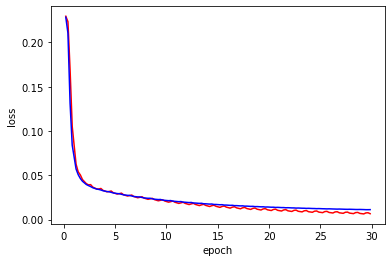

In [ ]:
# 【問題6】学習と推定:学習
nnc = ScratchSimpleNeuralNetrowkClassifier(seed=0, verbose = True, verbose2 = False)
nnc.fit(X_train, y_train, X_val, y_val)
# 【問題7】学習曲線のプロット

In [ ]:
# 【問題6】学習と推定:推定
y_pred = nnc.predict(X_test)

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

<ipython-input-59-2c68b602cd2f>:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  true_false = y_pred==y_val


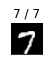

In [ ]:
# 【問題8】（アドバンス課題）誤分類の確認
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。
Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証データの正解ラベル(n_samples,)
X_val : 検証データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 36 # いくつ表示するか

true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')